In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
book=pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


### Representation of values from the above data

#### 0 = not bought

#### 1 = bought

In [3]:
book.shape

(2000, 11)

In [4]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


### Since the data is already in the form of 0s and 1s, no need of performimg one hot encoding / data preprocessing.

# APRIORI ALGORITHM

## for minimum support 0.1

In [6]:
# gives all the items sets
frequent_sets=apriori(book,min_support=0.1,use_colnames=True)
frequent_sets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [7]:
frequent_sets.shape

(39, 2)

# ASSOCIATION RULES

## With lift ratio

In [8]:
rules_l=association_rules(frequent_sets,metric='lift',min_threshold=1)
rules_l.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298


### best association rule with lift ratio metric

*Among 28 & 29 which has same lift ratio, 
**buys(X,ItalCook) => buys(X,Cookbks)** has highest confidence.*

*Hence, **28 is the best association rule**  among 29 & 28*

### 2nd best association rule with lift ratio metric 

*Among 78 & 79 which has same lift ratio, 
**buys(X,ArtBks & ChildBks) => buys(X,GeogBks)** has highest confidence.*

*Hence, **78 is the best association rule**  among 79 & 78*

### Similarly, the association rules are choosen

# ASSOCIATION RULES

## With confidence

In [9]:
rules_c=association_rules(frequent_sets,metric='confidence',min_threshold=0.5)
rules_c.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
40,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
43,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
46,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
24,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
25,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,0.558594
38,"(GeogBks, ArtBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000,0.540115
17,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,0.559416
20,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,0.559831
35,"(GeogBks, DoItYBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446,0.534479


### best association rule with 'confidence' metric

* **buys(X,ItalCook) => buys(X,Cookbks)** has highest confidence.

**Hence,12 is the best association rule** 

### 2nd best association rule with 'confidence' metric 
 
* **buys(X,DoItYBks, ArtBks) => buys(X,CookBks)** has highest confidence.

**Hence,40 is the best association rule**

### Similarly, the association rules are choosen

# ASSOCIATION RULES

## With Support metric

In [10]:
rules_s=association_rules(frequent_sets,metric='support',min_threshold=0.1)
rules_s.sort_values('support',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
11,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
10,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
26,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
27,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
20,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
21,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875,0.618236
5,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543


### best association rule with support metric

*Among 2 & 3 which has same support, 
**buys(X,ChildBks) => buys(X,CookBks)** has highest confidence.*

*Hence, **2 is the best association rule**  among 2 & 3*

### 2nd best association rule with support metric 

*Among 11 & 10 which has same support, 
**buys(X,GeogBks) => buys(X,ChildBks)** has highest confidence.*

*Hence, **10 is the best association rule**  among 11 & 10*

### Similarly, the association rules are choosen

# VISUALIZATION 

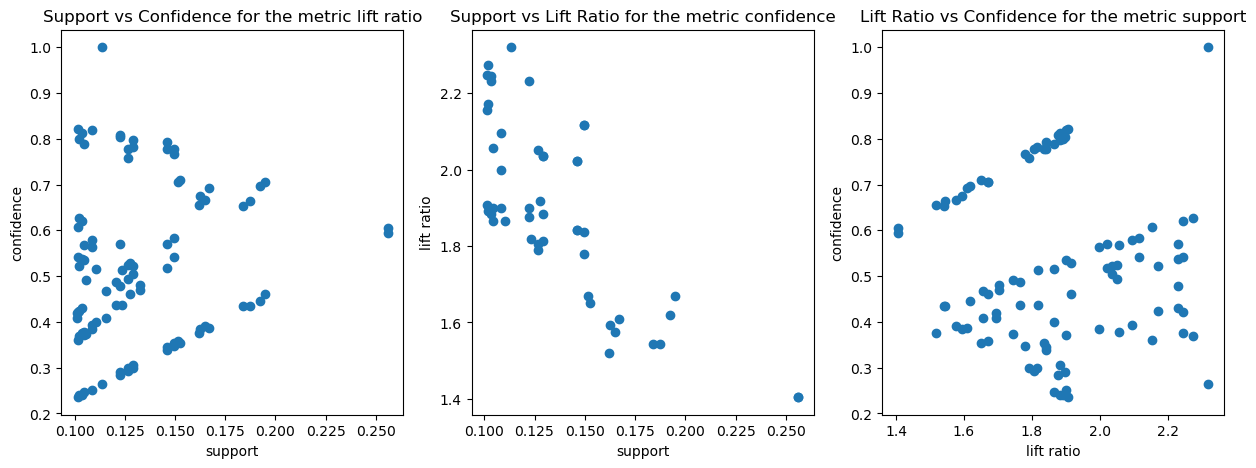

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(rules_l['support'], rules_l['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence for the metric lift ratio')
plt.subplot(132)
plt.scatter(rules_c['support'], rules_c['lift'])
plt.xlabel('support')
plt.ylabel('lift ratio')
plt.title('Support vs Lift Ratio for the metric confidence')
plt.subplot(133)
plt.scatter(rules_s['lift'], rules_s['confidence'])
plt.xlabel('lift ratio')
plt.ylabel('confidence')
plt.title('Lift Ratio vs Confidence for the metric support')
plt.show()

# APRIORI ALGORITHM

## for minimum support 0.05

In [12]:
# gives all the items sets
frequent_sets=apriori(book,min_support=0.05,use_colnames=True)
frequent_sets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, GeogBks, DoItYBks, CookBks)"
96,0.0560,"(YouthBks, ArtBks, GeogBks, CookBks)"
97,0.0650,"(GeogBks, ArtBks, DoItYBks, CookBks)"
98,0.0510,"(YouthBks, GeogBks, DoItYBks, CookBks, ChildBks)"


In [13]:
frequent_sets.shape

(100, 2)

# ASSOCIATION RULES

## With lift ratio

In [14]:
rules_l=association_rules(frequent_sets,metric='lift',min_threshold=3)
rules_l.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301,0.821427
1,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193,0.776487
9,"(ChildBks, ItalCook)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923,0.752277
8,"(GeogBks, CookBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125,0.852425
7,"(GeogBks, ItalCook)","(ChildBks, CookBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522,0.734961
10,"(ChildBks, CookBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474,0.924629
16,"(ChildBks, ArtBks, CookBks)","(GeogBks, DoItYBks)",0.1265,0.1325,0.0535,0.422925,3.191886,0.036739,1.503271,0.786154
17,"(GeogBks, DoItYBks)","(ChildBks, ArtBks, CookBks)",0.1325,0.1265,0.0535,0.403774,3.191886,0.036739,1.465047,0.791591
11,(ItalCook),"(GeogBks, ChildBks, CookBks)",0.1135,0.1495,0.0525,0.462555,3.094014,0.035532,1.582488,0.763446
6,"(GeogBks, ChildBks, CookBks)",(ItalCook),0.1495,0.1135,0.0525,0.351171,3.094014,0.035532,1.366307,0.795762


### best association rule with lift ratio metric

*Among 0 & 1 which has same lift ratio, 
**buys(X,ItalCook) => buys(X,Cookbks, YouthBks)** has highest confidence.*

*Hence, **1 is the best association rule**  among 0 & 1*

### 2nd best association rule with lift ratio metric 

*Among 7 & 10 which has same lift ratio, 
**buys(X,ItalCook, ChildBks) => buys(X,CookBks, GeogBks)** has highest confidence.*

*Hence, **10 is the best association rule**  among 7 & 10*

### Similarly, the association rules are choosen

# ASSOCIATION RULES

## With confidence

In [15]:
rules_c=association_rules(frequent_sets,metric='confidence',min_threshold=0.8)
rules_c.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,0.641850
15,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf,0.604676
49,"(GeogBks, ChildBks, ItalCook)",(CookBks),0.0525,0.431,0.0525,1.000000,2.320186,0.029872,inf,0.600528
6,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf,0.621858
23,"(GeogBks, ItalCook)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf,0.607906
22,"(ArtBks, ItalCook)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf,0.603074
19,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf,0.604355
32,"(YouthBks, RefBks, DoItYBks)",(ChildBks),0.0580,0.423,0.0530,0.913793,2.160267,0.028466,6.693200,0.570164
35,"(YouthBks, RefBks, GeogBks)",(ChildBks),0.0570,0.423,0.0515,0.903509,2.135955,0.027389,5.979818,0.563972
59,"(YouthBks, ChildBks, GeogBks, DoItYBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182,0.553810


### best association rule with 'confidence' metric

* **buys(X,ItalCook) => buys(X,Cookbks)** has highest confidence.

**Hence,0 is the best association rule** 

### 2nd best association rule with 'confidence' metric 
 
* **buys(X,DoItYBks, ArtBks) => buys(X,CookBks)** has highest confidence.

**Hence,15 is the best association rule**

### Similarly, the association rules are choosen

# ASSOCIATION RULES

## With Support metric

In [16]:
rules_s=association_rules(frequent_sets,metric='support',min_threshold=0.1)
rules_s.sort_values('support',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
11,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
10,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
26,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
27,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
20,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
21,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875,0.618236
5,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
4,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543


### best association rule with support metric

*Among 2 & 3 which has same support, 
**buys(X,ChildBks) => buys(X,CookBks)** has highest confidence.*

*Hence, **3 is the best association rule**  among 2 & 3*

### 2nd best association rule with support metric 

*Among 11 & 10 which has same support, 
**buys(X,GeogBks) => buys(X,ChildBks)** has highest confidence.*

*Hence, **10 is the best association rule**  among 11 & 10*

### Similarly, the association rules are choosen

# VISUALIZATION 

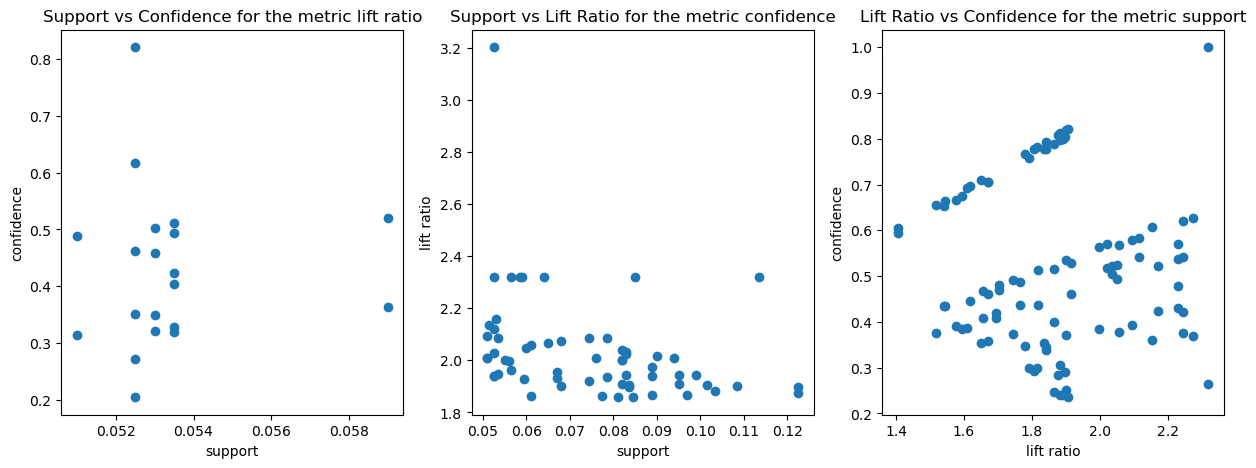

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(rules_l['support'], rules_l['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence for the metric lift ratio')
plt.subplot(132)
plt.scatter(rules_c['support'], rules_c['lift'])
plt.xlabel('support')
plt.ylabel('lift ratio')
plt.title('Support vs Lift Ratio for the metric confidence')
plt.subplot(133)
plt.scatter(rules_s['lift'], rules_s['confidence'])
plt.xlabel('lift ratio')
plt.ylabel('confidence')
plt.title('Lift Ratio vs Confidence for the metric support')
plt.show()